In [37]:
sns.set_style("whitegrid")
from mypy.viz import tableau20

# data generated by CPT

In [67]:
bf_cpt_pr = {}
bf_cpt_rf = {}
bf_chase = {}


problemsets = ['sixproblems', 'glockner', 'tpt']

for ps in problemsets:
    
    
    
    try:
        name = 'cpt_recovery_%s_cpt' % ps
        pth = '%s/%s(prelec_gamma,s|gen_s=2)_recovery_results.csv' % (name, name)
        bf_cpt_pr[ps] = pd.read_csv(pth, index_col=0)
    except:
        pass
    
    try:
        name = 'cpt_recovery_%s_cpt_rf' % ps
        pth = '%s/%s(prelec_gamma,s|gen_s=2)_recovery_results.csv' % (name, name)
        bf_cpt_rf[ps] = pd.read_csv(pth, index_col=0)
    except:
        pass


    name = 'cpt_recovery_%s_chase_fixedT' % ps
    pth = '%s/%s(prelec_gamma|gen_s=2)_recovery_results.csv' % (name, name)
    try:
        bf_chase[ps]  = pd.read_csv(pth, index_col=0)
    except:
        pass


In [41]:
T = [2, 4, 6, 8, 10, 50, 100]
gammas = [.6, 1, 1.4]

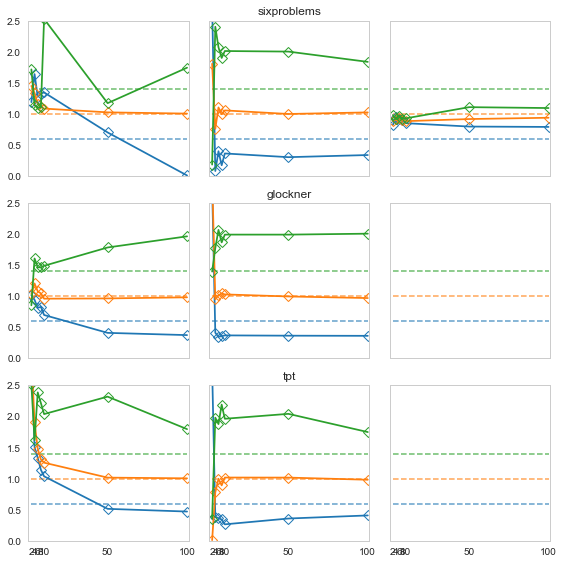

In [68]:
cols = [tableau20[i] for i in [0, 2, 4]]

fig, ax = plt.subplots(len(problemsets), 3, figsize=(8,8), sharey=True, sharex=True)


for axi in ax.ravel():
    
    for i, gamma in enumerate(gammas):
        axi.plot(T, np.ones(len(T))*gamma, '--', label=gamma, color=cols[i], alpha=.6)
    

for j, ps in enumerate(problemsets):

    for i, gamma in enumerate(gammas):
        
        if ps in bf_cpt_pr:        
            ax[j][0].plot(T, bf_cpt_pr[ps][bf_cpt_pr[ps].gen_prelec_gamma==gamma]['bf_prelec_gamma'].values, 
                          '-D', markerfacecolor='None', markeredgewidth=1, markeredgecolor=cols[i], color=cols[i])
        
        if ps in bf_cpt_rf:
            ax[j][1].plot(T, bf_cpt_rf[ps][bf_cpt_rf[ps].gen_prelec_gamma==gamma]['bf_prelec_gamma'].values, 
                          '-D', markerfacecolor='None', markeredgewidth=1, markeredgecolor=cols[i], color=cols[i])
        
        if ps in bf_chase:
            ax[j][2].plot(T, bf_chase[ps][bf_chase[ps].gen_prelec_gamma==gamma]['bf_prelec_gamma'].values, 
                          '-D', markerfacecolor='None', markeredgewidth=1, markeredgecolor=cols[i], color=cols[i])

    ax[j][1].set_title(ps)

    
for axi in ax.ravel():
    axi.set_ylim(0,2.5)
    axi.set_xlim(0, 101)
    axi.grid(None)
    axi.set_xticks(T)
    
    

    
plt.tight_layout()
plt.show()